In [2]:
# load the dataset from kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'dog-and-cat-classification-dataset' dataset.
Path to dataset files: /kaggle/input/dog-and-cat-classification-dataset


In [3]:
from tensorflow import keras
import numpy as np
import pandas as pd
from PIL import Image
import os

In [4]:
def load_images_from_folder(folder, label, img_size=(128,128), max_images=2500):
    images, labels = [], []
    for i, filename in enumerate(os.listdir(folder)):
        if filename.endswith('.jpg'):
            try:
                img = Image.open(os.path.join(folder, filename)).convert('RGB')
                img = img.resize(img_size)
                images.append(np.array(img))
                labels.append(label)
            except:
                continue
        if max_images and i >= max_images-1:
            break
    return images, labels

cat_images, cat_labels = load_images_from_folder(f'{path}/PetImages/Cat', 0)
dog_images, dog_labels = load_images_from_folder(f'{path}/PetImages/Dog', 1)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

# After resizing and normalizing images once
np.save('preprocessed_X.npy', X)
np.save('preprocessed_y.npy', y)


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [5]:
print(X.shape)
print(y.shape)

(5000, 128, 128, 3)
(5000,)


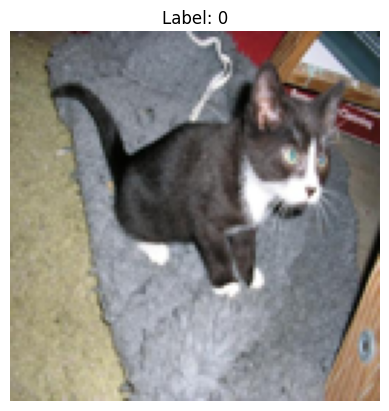

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[2])
plt.title(f"Label: {y[2]}")
plt.axis('off')
plt.show()

In [7]:
import numpy as np
# from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import to_categorical

X = np.load('preprocessed_X.npy')
y = np.load('preprocessed_y.npy')

#Normalize images from [0,255] to [0, 1]
X = X.astype('float32') / 255.0

num_filters = 32
filter_size = 3
pool_size = 2

#Build the model
# model = Sequential([
#     Conv2D(num_filters, filter_size, input_shape = (64, 64, 3)),
#     MaxPooling2D(pool_size=pool_size),
#     Flatten(),
#     Dense(2,activation='softmax'),
# ])

model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    'adam',
    loss ='binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    X,
    y,
    epochs = 15,
    validation_split = 0.2
)

model.save_weights('cat_vs_dog_5epochs.weights.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 97s 762ms/step - accuracy: 0.6363 - loss: 0.9333 - val_accuracy: 0.2810 - val_loss: 0.9096
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 746ms/step - accuracy: 0.7070 - loss: 0.5766 - val_accuracy: 0.3590 - val_loss: 0.9755
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 734ms/step - accuracy: 0.7775 - loss: 0.4973 - val_accuracy: 0.4800 - val_loss: 0.8993
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 144s 748ms/step - accuracy: 0.8044 - loss: 0.4269 - val_accuracy: 0.5170 - val_loss: 0.9200
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 753ms/step - accuracy: 0.8664 - loss: 0.3174 - val_accuracy: 0.5800 - val_loss: 0.8804
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 139s 726ms/step - accuracy: 0.9066 - loss: 0.2260 - val_accuracy: 0.7230 - val_loss: 0.6740
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 147s 767ms/step - accuracy: 0.9335 - loss: 0.1709 - val_accuracy: 0.6360 - val_loss: 1.1945
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 141s 756ms/step - accuracy: 0.9753 - 

FileNotFoundError: [Errno 2] Unable to synchronously create file (unable to open file: name = 'weights/cat_vs_dog_5epochs.weights.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [9]:
model.save_weights('cat_vs_dog_15epochs_colab_v1.weights.h5')